In [1]:
%pip install -q matplotlib
%pip install -q torchviz torchinfo
%pip install -q tqdm

In [2]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

import torch
from torch import nn, optim
from torchinfo import summary

%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

## Learning in Neural Network
#### Workflow
1. ```data_loader```: Loads a dataset.Visualizing data beforehand is important,<br>　　　　　　as it helps you understand the characteristics.
2. ```model```: Builds a network as the solver for your issues
3. ```criteria```: Calculates the loss
4. ```optimizer```: Updates model paramters based on the above loss

#### Training, validation, and test
1. Update network parameters in training
2. Tune hyper parameters in validation (if necessary)
3. Evaluate the performance of the trained model

```
train_data, test_data = data_loader.load(xxx)

model = Net(xxx)
criteria = torch.nn.xxLoss()
optimizer = optim.XX()

num_epochs = xxxx
for eoch in range(num_epochs):
    optimizer.zero_grad()

    # Train.
    inputs, labels = train_data
    outputs = model(inputs)
    train_loss = criterion(outputs, labels)
    train_score = evaluate(outputs, labels)

    loss.backward()
    optimizer.step()

    # Test.
    inputs, labels = test_data
    outputs = model(inputs)
    test_loss = criterion(outputs, labels)
    test_score = evaluate(outputs, labels)
```

##### How to build a network
```
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define layer here.
    
    def forward(x):
        # Define forward operation here.
```

In [3]:
class Net(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output, bias=False)

        nn.init.constant_(self.l1.weight, 1)  # Fill l1 weights with one.
        nn.init.constant_(self.l1.bias, 2)    # Fill l1 bias with two.

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        return x

# Layer1: x = W1 * x + B1 (W1: 3x2 matrix with 1, B1: 3x1 vector with 2)
#         9 Parameters (3 x 2 + 3)
# Layer2: x = W2 * x      (W2: 1x3 matrix with random value, B2: None)
#         3 Paramaters (1 x 3)
model = Net(2, 3, 1)
print(f'Layer1 Weight Matrix (shape: {model.l1.weight.shape})')
print(model.l1.weight, '\n')
print(f'Layer1 Bias Vector (shape: {model.l1.bias.shape})')
print(model.l1.bias, '\n')
print(f'Layer2 Weight Matrix (shape: {model.l2.weight.shape})')
print(model.l2.weight, '\n')

# Print the network summary.
print('summary:')
print(model)
summary(model)

Layer1 Weight Matrix (shape: torch.Size([3, 2]))
Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True) 

Layer1 Bias Vector (shape: torch.Size([3]))
Parameter containing:
tensor([2., 2., 2.], requires_grad=True) 

Layer2 Weight Matrix (shape: torch.Size([1, 3]))
Parameter containing:
tensor([[ 0.1179,  0.0460, -0.1513]], requires_grad=True) 

summary:
Net(
  (l1): Linear(in_features=2, out_features=3, bias=True)
  (l2): Linear(in_features=3, out_features=1, bias=False)
)


Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            9
├─Linear: 1-2                            3
Total params: 12
Trainable params: 12
Non-trainable params: 0


## Linear Regression

In [4]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

dataset = sklearn.datasets.fetch_california_housing()
x_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y_df = pd.DataFrame(dataset.target, columns=['HousingPrices'])

pd.concat([x_df, y_df], axis=1).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


torch.Size([14447, 1]) torch.Size([14447, 1]) torch.Size([6192, 1]) torch.Size([6192, 1])


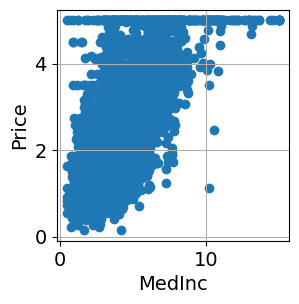

In [5]:
from sklearn.model_selection import train_test_split
KEY='MedInc'
VALUE='Price'

# Split loaded data into train-data and test-data.
train_x, test_x, train_y, test_y = train_test_split(
    x_df[KEY], y_df, train_size=0.7, test_size=0.3)

# Convert data into Tensor style.
train_X = torch.Tensor(train_x.values).float().view(-1, 1)
train_Y = torch.Tensor(train_y.values).float().view(-1, 1)
test_X = torch.Tensor(test_x.values).float().view(-1, 1)
test_Y = torch.Tensor(test_y.values).float().view(-1, 1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

plt.xlabel(KEY)
plt.ylabel(VALUE)
plt.scatter(test_X.data, test_Y.data)
plt.show()

In [6]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x = self.l1(x)
        return x

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

  0%|          | 0/5000 [00:00<?, ?it/s]

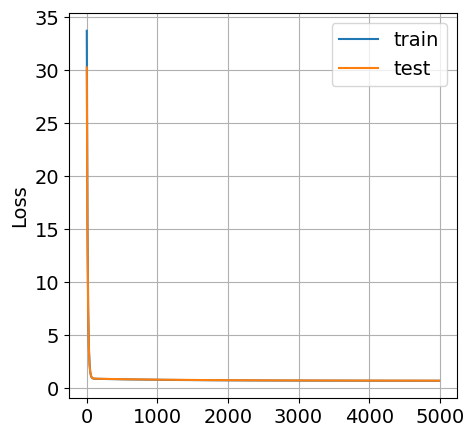

In [7]:
n_input = train_X.shape[1]
n_output = train_Y.shape[1]
model = Net(n_input, n_output)
display(summary(model))

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

num_epochs = 5000
train_history = []
test_history = []
with tqdm(range(num_epochs)) as pbar:
    for epoch in pbar:
        optimizer.zero_grad()

        outputs = model(train_X)
        loss = criterion(outputs, train_Y)

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            train_history.append([epoch, loss.item()])

            test_outputs = model(test_X)
            test_loss = criterion(test_outputs, test_Y)
            test_history.append([epoch, test_loss.item()])

            pbar.set_postfix({'train_loss': loss.item(), 'test_loss': test_loss.item()})

train_history = np.array(train_history)
test_history = np.array(test_history)
plt.figure(figsize=(5,5))
plt.plot(train_history[:, 0], train_history[:, 1], label='train')
plt.plot(test_history[:, 0], test_history[:, 1], label='test')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
torch.Tensor([test_X.min(), test_X.max()]).view(-1, 1)

tensor([[ 0.4999],
        [15.0001]])

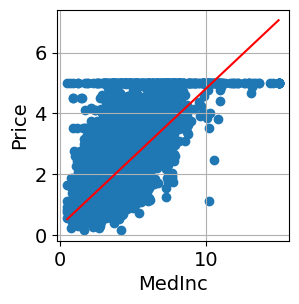

In [9]:
plt.xlabel(KEY)
plt.ylabel(VALUE)
plt.scatter(test_X.data, test_Y.data)

with torch.no_grad():
    X_range = torch.Tensor([test_X.min(), test_X.max()]).view(-1, 1)
    Y_range = model(X_range)

plt.plot(X_range.data, Y_range.data, c='r')
plt.show()

## Binary Classification (A or B)
* Network
  * L1: Fully Connected Layer
  * L2: Sigmoid, which returns the inference as the probability [0.0, 1.0]
* Criteria
  * Binary Cross Entropy (BCE Loss)<br>
$L(y, \hat{y}) = -[\ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\ ]$ s.t. $y: label, \hat(y): prediction$

torch.Size([70, 2]) torch.Size([70, 1]) torch.Size([30, 2]) torch.Size([30, 1])


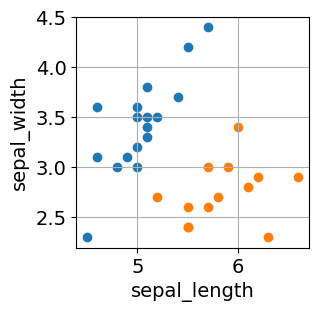

In [10]:
from sklearn.datasets import load_iris
classes = ['setosa', 'versicolor']

dataset = load_iris()
X = dataset.data
y = dataset.target

# Split loaded data into train-data and test-data.
inputs, test_inputs, labels, test_labels = train_test_split(
    X[y < 2][:,:2], y[y < 2], train_size=0.7, test_size=0.3)

# Convert data into Tensor style.
inputs = torch.Tensor(inputs).float()
labels = torch.Tensor(labels).float().view(-1, 1)
test_inputs = torch.Tensor(test_inputs).float()
test_labels = torch.Tensor(test_labels).float().view(-1, 1)
print(inputs.shape, labels.shape, test_inputs.shape, test_labels.shape)

for t, label in enumerate(classes):
    x_t = test_inputs[test_labels[:,0] == t]
    plt.scatter(x_t[:,0], x_t[:,1], label=label)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [11]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.l1(x)
        x = self.sigmoid(x)
        return x

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            3
├─Sigmoid: 1-2                           --
Total params: 3
Trainable params: 3
Non-trainable params: 0

  0%|          | 0/10000 [00:00<?, ?it/s]

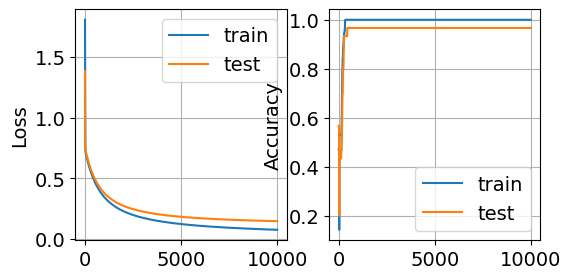

In [12]:
model = Net(inputs.shape[1], labels.shape[1])
display(summary(model))

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

num_epochs = 10000
train_history = []
test_history = []
with tqdm(range(num_epochs)) as pbar:
    for epoch in pbar:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            predicted = torch.where(outputs < 0.5, 0, 1)
            acc = (predicted == labels).sum() / len(labels)
            train_history.append([epoch, loss.item(), acc.item()])

            test_outputs = model(test_inputs)
            test_loss = criterion(test_outputs, test_labels)
            test_predicted = torch.where(test_outputs < 0.5, 0, 1)
            test_acc = (test_predicted == test_labels).sum() / len(test_labels)
            test_history.append([epoch, test_loss.item(), test_acc.item()])

            pbar.set_postfix({
                'loss': loss.item(), 'acc': acc.item(), 'test_loss': test_loss.item(), 'test_acc': test_acc.item()
            })

train_history = np.array(train_history)
test_history = np.array(test_history)

plt.figure(figsize=(6, 3))
ax = plt.subplot(1, 2, 1)
ax.set_ylabel('Loss')
ax.plot(train_history[:, 0], train_history[:, 1], label='train')
ax.plot(test_history[:, 0], test_history[:, 1], label='test')
ax.legend()

ax = plt.subplot(1, 2, 2)
ax.set_ylabel('Accuracy')
ax.plot(train_history[:, 0], train_history[:, 2], label='train')
ax.plot(test_history[:, 0], test_history[:, 2], label='test')
ax.legend()

plt.show()

Boundary: 3.13 * x1 + -5.16 * x2 + -0.841 = 0


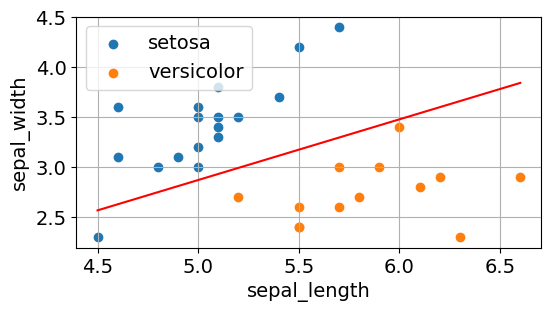

In [13]:
def draw_decision_boundary(x, layer):
    weight = layer.weight.data.numpy()
    bias = layer.bias.data.numpy()
    print(f'Boundary: {weight[0,0]:.3} * x1 + {weight[0,1]:.3} * x2 + {bias[0]:.3} = 0')
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# Plot inputs.
plt.figure(figsize=(6,3))
for t, label in enumerate(classes):
    x_t = test_inputs[test_labels[:,0] == t]
    plt.scatter(x_t[:,0], x_t[:,1], label=label)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

# Draw the boundary.
x_range = np.array([test_inputs[:,0].min().item(), test_inputs[:,0].max().item()])
y_range = draw_decision_boundary(x_range, model.l1)
plt.plot(x_range, y_range, c='r')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## Multi-class Classification
* Criteria : torch.nn.CrossEntropyLoss
  1. Apply torch.nn.LogSoftmax to the NN outputs
  2. Apply torch.nn.NLLLoss to the log softmax values
  * Softmax: $$ P(y=t|z) = \frac{e^{z_t}}{\sum_{i=1}^{T} e^{z_i}}$$
  * Cross Entropy Loss: $$L = -\sum_{t=1}^{T} y_{t} \log P(y = t \mid z)$$


torch.Size([105, 2]) torch.Size([105]) torch.Size([45, 2]) torch.Size([45])


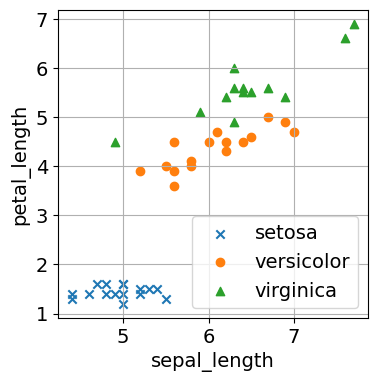

In [14]:
classes = ['setosa', 'versicolor', 'virginica']
markers = ['x', 'o', '^']

# Split loaded data into train-data and test-data.
inputs, test_inputs, labels, test_labels = train_test_split(
    X[:, [0, 2]], y, train_size=0.7, test_size=0.3)

# Convert data into Tensor style.
inputs = torch.Tensor(inputs).float()
labels = torch.Tensor(labels).long()
test_inputs = torch.Tensor(test_inputs).float()
test_labels = torch.Tensor(test_labels).long()
print(inputs.shape, labels.shape, test_inputs.shape, test_labels.shape)

plt.figure(figsize=(4,4))
for t, [label, marker] in enumerate(zip(classes, markers)):
    x_t = test_inputs[test_labels == t]
    plt.scatter(x_t[:,0], x_t[:,1], label=label, marker=marker)

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [15]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x = self.l1(x)
        return x

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            9
Total params: 9
Trainable params: 9
Non-trainable params: 0

  0%|          | 0/10000 [00:00<?, ?it/s]

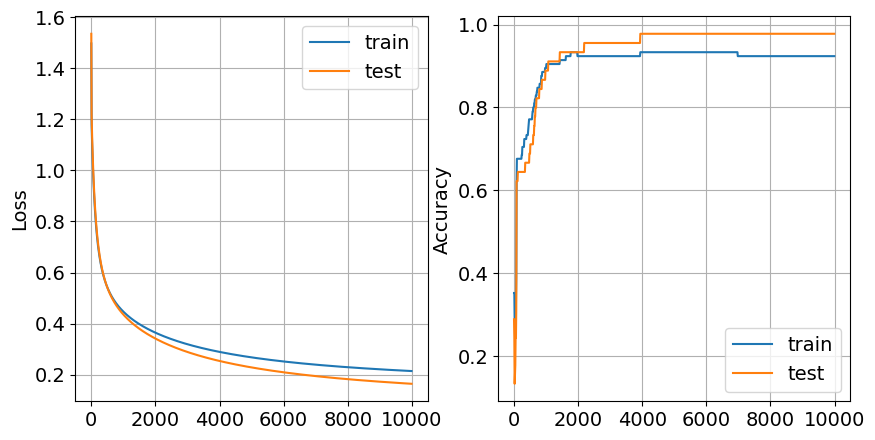

In [16]:
model = Net(inputs.shape[1], len(classes))
display(summary(model))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

num_epochs = 10000
train_history = []
test_history = []
with tqdm(range(num_epochs)) as pbar:
    for epoch in pbar:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            _, predicted = torch.max(outputs, 1)
            acc = (predicted == labels).sum() / len(labels)
            train_history.append([epoch, loss.item(), acc.item()])

            test_outputs = model(test_inputs)
            test_loss = criterion(test_outputs, test_labels)
            _, test_predicted = torch.max(test_outputs, 1)
            test_acc = (test_predicted == test_labels).sum() / len(test_labels)
            test_history.append([epoch, test_loss.item(), test_acc.item()])

            pbar.set_postfix({
                'loss': loss.item(), 'acc': acc.item(), 'test_loss': test_loss.item(), 'test_acc': test_acc.item()
            })

train_history = np.array(train_history)
test_history = np.array(test_history)

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
ax.set_ylabel('Loss')
ax.plot(train_history[:, 0], train_history[:, 1], label='train')
ax.plot(test_history[:, 0], test_history[:, 1], label='test')
ax.legend()

ax = plt.subplot(1, 2, 2)
ax.set_ylabel('Accuracy')
ax.plot(train_history[:, 0], train_history[:, 2], label='train')
ax.plot(test_history[:, 0], test_history[:, 2], label='test')
ax.legend()

plt.show()

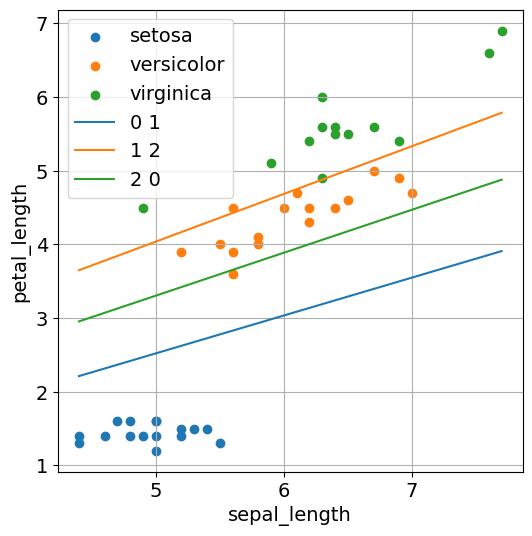

In [17]:
def draw_decision_boundary(x, i,j, layer):
    W = layer.weight.data
    B = layer.bias.data
    W1 = W[j,:]
    W2 = W - W1
    w = W2[i,:]
    B1 = B[j]
    B2 = B - B1
    b = B2[i]
    v = -1/w[1]*(w[0]*x + b)
    return v

plt.figure(figsize=(6, 6))
for t, label in enumerate(classes):
    x_t = test_inputs[test_labels == t]
    plt.scatter(x_t[:,0], x_t[:,1], label=label)

x_bound = torch.Tensor([test_inputs[:,0].min(), test_inputs[:,0].max()])
for i, j in [(0, 1), (1, 2), (2, 0)]:
    y_bound = draw_decision_boundary(x_bound, i, j, model.l1)
    plt.plot(x_bound, y_bound, label=f'{i} {j}')

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()